# INTRODUCTION TO REGRESSION WITH NEURAL NETWORKS IN TENSORFLOW

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-07-18 20:59:47.137885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 20:59:49.259044: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.11.0


## Creating data to view and fit

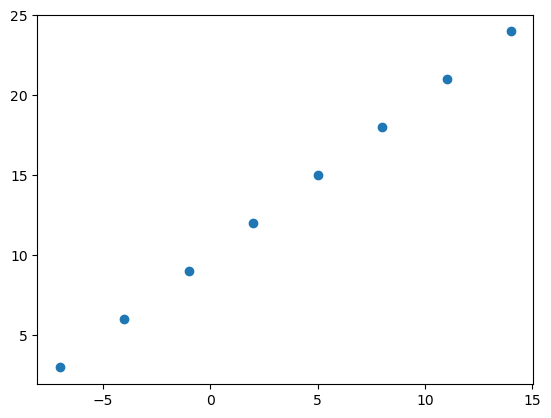

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-07-18 21:00:09.968557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
x[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
x[0].ndim

0

In [8]:
x[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our NumPy Arayys into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

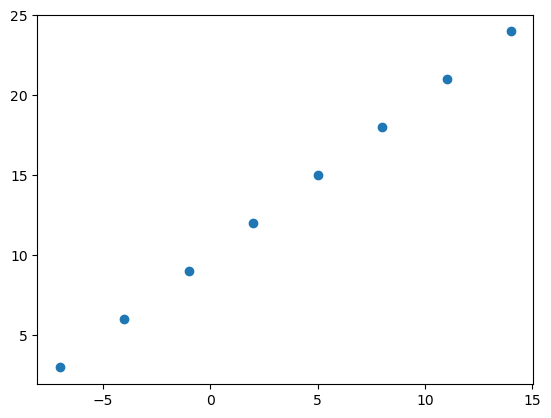

In [11]:
plt.scatter(x, y)

# Steps in modelling with TensorFlow

1. Creating a model
2. Compiling a model
3. Fitting a model

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 953ms/step - loss: 21.5552 - mae: 21.5552
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 21.1620 - mae: 21.1620
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 20.7689 - mae: 20.7689
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 20.4107 - mae: 20.4107
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 20.1295 - mae: 20.1295


In [13]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 234ms/step


array([[-23.02756]], dtype=float32)

In [15]:
y_pred + 11

array([[-12.027559]], dtype=float32)

## Imporving our Model

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [16]:
# let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# 3. Fit the model (this time we train for longer)
model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100


1/1 [==============================] - 1s 679ms/step - loss: 14.3682 - mae: 14.3682
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 14.2357 - mae: 14.2357
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 14.1032 - mae: 14.1032
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.9707 - mae: 13.9707
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 13.8382 - mae: 13.8382
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 13.7057 - mae: 13.7057
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 13.5732 - mae: 13.5732
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4407 - mae: 13.4407
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 13.3082 - mae: 13.3082
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 13.1757 - mae: 13.1757
Epoch 11/100
1/1 [==============================] - 0s 22ms/

In [17]:
# Remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 138ms/step


array([[29.395443]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

model.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.7184 - mae: 14.7184
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1686 - mae: 14.1686
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.6230 - mae: 13.6230
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 13.0907 - mae: 13.0907
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 12.5801 - mae: 12.5801
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 12.0801 - mae: 12.0801
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7258 - mae: 11.7258
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 11.3657 - mae: 11.3657
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0024 - mae: 11.0024
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 10.6426 - mae: 10.6426
Epoch 11/100
1/1 [==============================] -

In [20]:
# let's remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
model.predict([17.0])

1/1 [==============================] - 0s 164ms/step


array([[27.829794]], dtype=float32)

# Evaluating a Modal

In [22]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

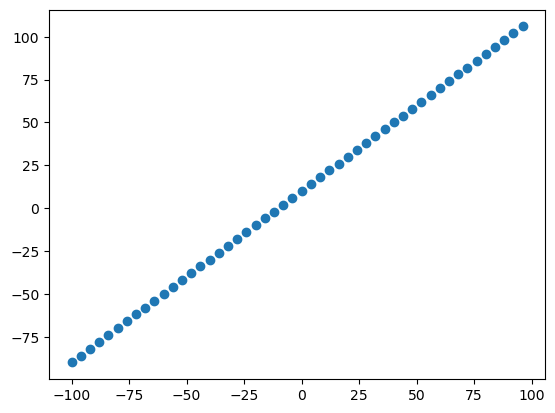

In [24]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(x)

50

In [26]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
x_test = x[40:] # last 10 are testing samples (20% of the data)

y_train = y[:40] # first 40 are training samples (80% of the data)
y_test = y[40:] # last 10 are testing samples (20% of the data)

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data ###

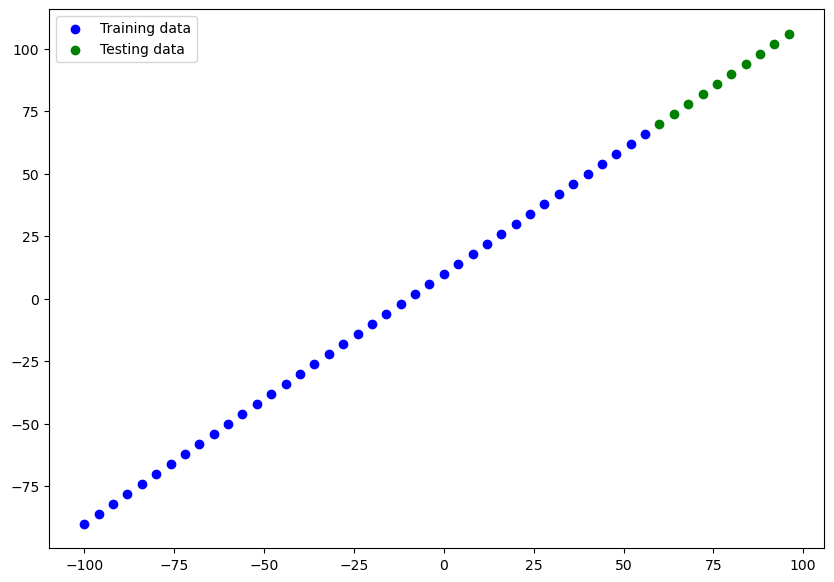

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend()

In [28]:
# Lets have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# # 3. Fit the model
# model.fit(x_train, y_train, epochs=100)

# Visualizing the data

In [29]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="modal_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])



In [30]:
model.summary()

Model: "modal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [31]:
# fit the model
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 61.5274 - mae: 61.5274
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 26.1352 - mae: 26.1352
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 19.1890 - mae: 19.1890
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 14.0110 - mae: 14.0110
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 19.1506 - mae: 19.1506
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5742 - mae: 9.5742
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5558 - mae: 10.5558
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 12.8778 - mae: 12.8778
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 33.8000 - mae: 33.8000
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 23.1222 - mae: 23.1222
Epoch 11/100
2/2 [==============================] -

In [32]:
# get a summary of our model
model.summary()

Model: "modal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [33]:
# from tensorflow.keras.utils import plot_model

# plot_model(model=model, show_shapes=True)


### Visualizing our modals predictions

In [34]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 116ms/step


array([[ 78.38006 ],
       [ 83.48893 ],
       [ 88.59781 ],
       [ 93.70668 ],
       [ 98.81555 ],
       [103.92442 ],
       [109.033295],
       [114.14215 ],
       [119.25104 ],
       [124.35992 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
# lets create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """_summary_
    Plots training data, test data and compares predictions to ground truth

    Args:
        train_data (_type_, optional): _description_. Defaults to x_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to x_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to y_pred.
    """

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # show the legend
    plt.legend()

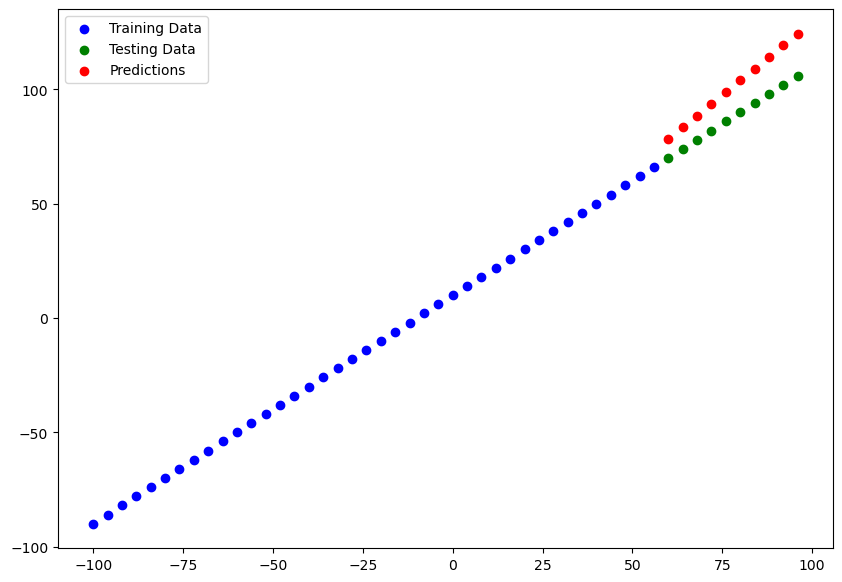

In [37]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

In [38]:
# Evaluate the modal on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 263ms/step - loss: 13.3700 - mae: 13.3700


[13.369985580444336, 13.369985580444336]

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.247976, 10.502214, 10.      , 10.741336, 12.889331, 16.339539,
       21.033295, 26.14215 , 31.251038, 36.359917], dtype=float32)>

In [40]:
y_pred

array([[ 78.38006 ],
       [ 83.48893 ],
       [ 88.59781 ],
       [ 93.70668 ],
       [ 98.81555 ],
       [103.92442 ],
       [109.033295],
       [114.14215 ],
       [119.25104 ],
       [124.35992 ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.38006 ,  83.48893 ,  88.59781 ,  93.70668 ,  98.81555 ,
       103.92442 , 109.033295, 114.14215 , 119.25104 , 124.35992 ],
      dtype=float32)>

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.369986>

In [44]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=188.90068>

In [45]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))



## Running experiments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [46]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100)

Epoch 1/100


2/2 [==============================] - 1s 20ms/step - loss: 71.3254 - mae: 71.3254
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 36.0741 - mae: 36.0741
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6583 - mae: 7.6583
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8181 - mae: 9.8181
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0267 - mae: 11.0267
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1889 - mae: 10.1889
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2070 - mae: 9.2070
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1476 - mae: 9.1476
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 11.7530 - mae: 11.7530
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 13.6699 - mae: 13.6699
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss:

1/1 [==============================] - 0s 112ms/step


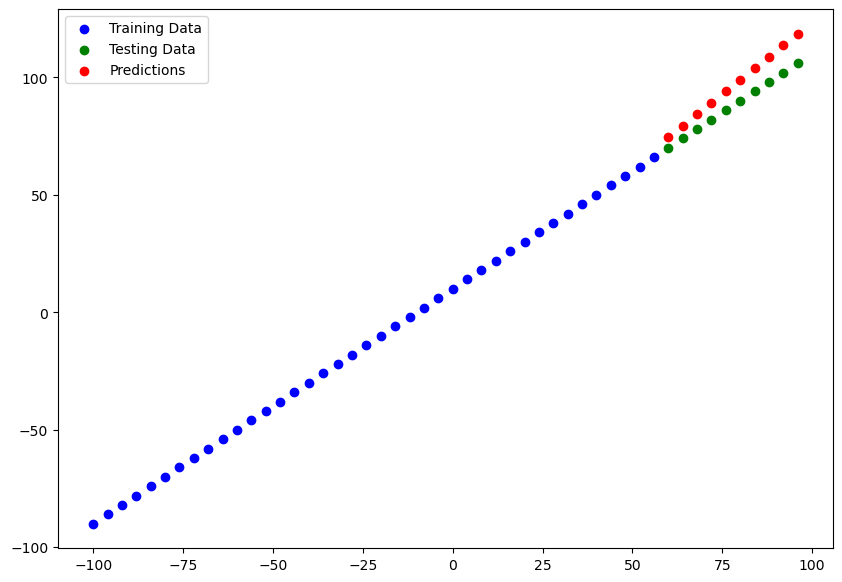

In [47]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.559559>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.74419>)

**Build `model_2`**

In [49]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 62.3547 - mse: 6125.4189
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 35.9966 - mse: 2059.4407
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 24.4839 - mse: 875.9064
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.7594 - mse: 230.6807
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 15.7359 - mse: 322.5364
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 12.4743 - mse: 199.7533
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 11.7383 - mse: 169.6142
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 12.1097 - mse: 201.8331
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 37.9450 - mse: 2222.8901
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 25.5410 - mse: 915.8312
Epoch 11/100
2/2 [==================

1/1 [==============================] - 0s 75ms/step


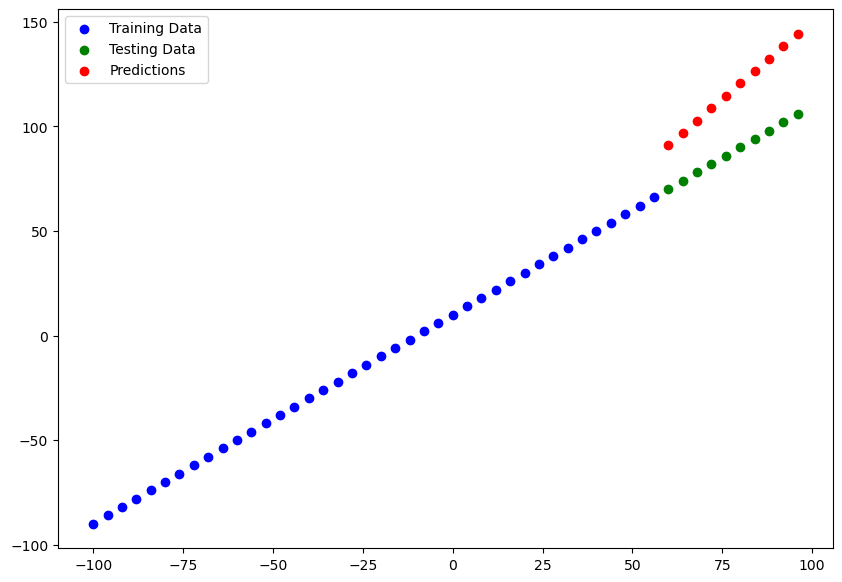

In [50]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2)

In [51]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.556183>,
 <tf.Tensor: shape=(), dtype=float32, numpy=904.4328>)

**Build `model_3`**

In [52]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=500, verbose=0)


1/1 [==============================] - 0s 88ms/step


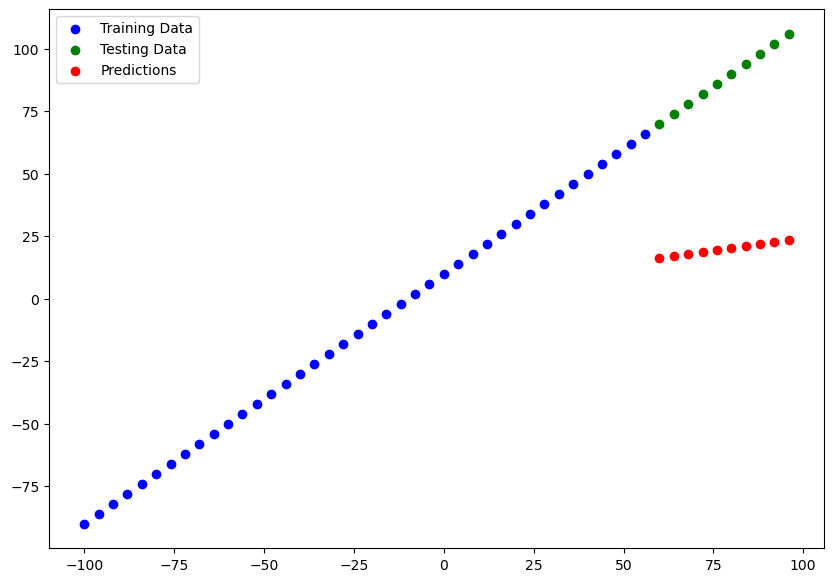

In [53]:
# Make and Plot some predictions
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [54]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.923515>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4697.922>)

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [55]:
# Lets's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.559559,79.744186
1,model_2,29.556183,904.432800
2,model_3,67.923515,4697.921875


Looks like model_2 performed the best

In [56]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Saving Our Models

In [57]:
# Save Model using the savemodal format
model_2.save("best_model_savedModel_format")

INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


In [58]:
# save model using the hdf5 format
model_2.save("best_model_HDF5_format.h5")

# Loading in a saved model

In [59]:
# load in the savedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_savedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compare model_2 predictions with saved model format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 299ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# load in a model doing h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 169ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example

In [63]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [65]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [69]:
# Create x and y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [70]:
# View x
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [71]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [67]:
# Create training and test sets
from sklearn.model_selection import train_test_split


In [ ]:
# Build a neural network